In [19]:
import pandas as pd
import seaborn as sb
from datetime import datetime, timedelta


In [100]:
train = pd.read_csv('./train.csv', header=0)
test = pd.read_csv('./test.csv', header=0)

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 12500 non-null  int64  
 1   age                         12500 non-null  int64  
 2   location                    12500 non-null  object 
 3   subscription_type           12500 non-null  object 
 4   payment_plan                12500 non-null  object 
 5   num_subscription_pauses     12500 non-null  int64  
 6   payment_method              12500 non-null  object 
 7   customer_service_inquiries  12500 non-null  object 
 8   signup_date                 12500 non-null  object 
 9   weekly_hours                12500 non-null  float64
 10  average_session_length      12500 non-null  float64
 11  song_skip_rate              12500 non-null  float64
 12  weekly_songs_played         12500 non-null  int64  
 13  weekly_unique_songs         125

In [104]:
train.head()

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned,loyalty
0,1,60,Maine,family premium,annual,0,credit,none,8.231109,0.880944,0.10,148,93,8,74,8,4,0,0,3934.882292
1,2,69,California,basic,monthly,1,credit,few,13.109191,2.580870,0.60,158,80,4,54,12,3,54,0,2132.882292
2,3,36,Nebrasksa,premium,annual,1,debit,none,19.617798,0.935676,0.21,319,188,5,89,11,3,156,0,2668.882292
3,4,73,Montana,premium,monthly,0,debit,none,26.023783,0.878620,0.15,375,354,6,45,8,4,149,0,2404.882292
4,5,58,Virginia,family premium,annual,0,credit,very frequent,17.876039,0.496145,0.01,239,124,8,69,12,6,0,0,3886.882292


Let's remove signup_date and replace it with 'loyalty' which is the number of days since signup:

In [103]:
train['signup_date_date'] = pd.to_datetime(train.signup_date)
train['loyalty'] = (datetime.now() - train.signup_date_date ) / pd.Timedelta(days=1)
train = train.drop(columns=['signup_date', 'signup_date_date'])

test['signup_date_date'] = pd.to_datetime(test.signup_date)
test['loyalty'] = (datetime.now() - test.signup_date_date ) / pd.Timedelta(days=1)
test = test.drop(columns=['signup_date', 'signup_date_date'])

In [105]:
categorical_features = [ c for c in train.columns if train[c].dtype == 'object' ]

In [106]:
categorical_features

['location',
 'subscription_type',
 'payment_plan',
 'payment_method',
 'customer_service_inquiries']

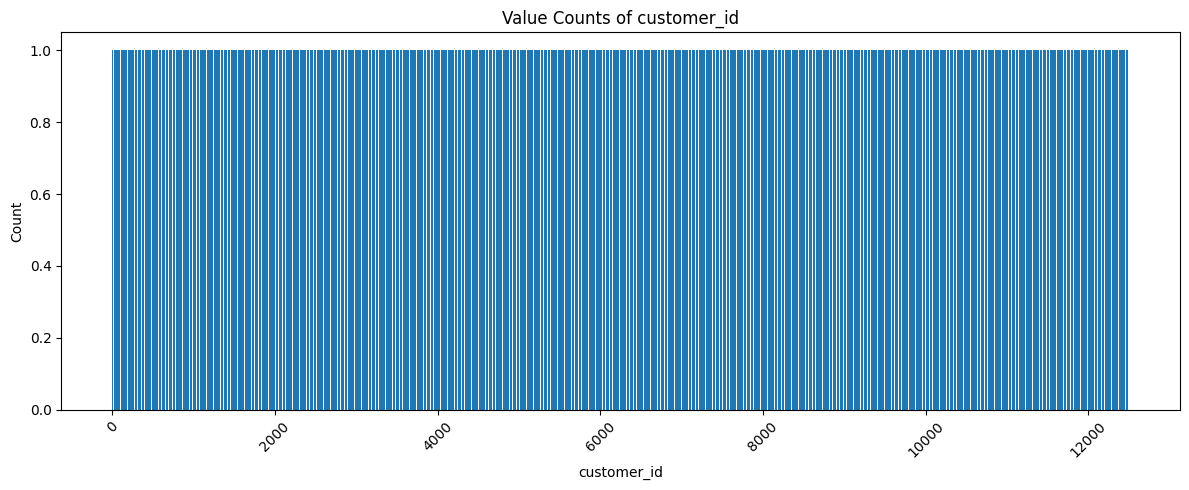

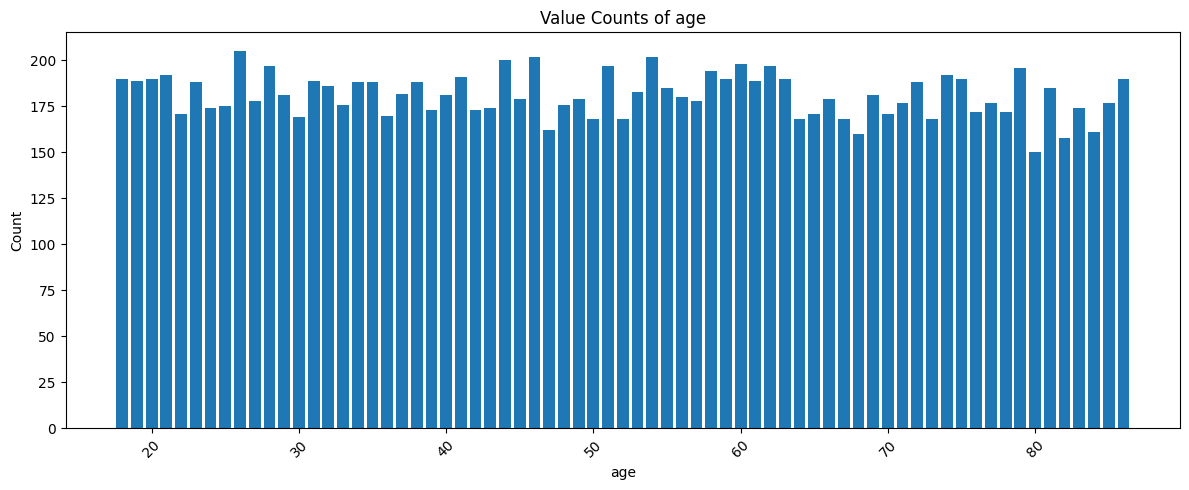

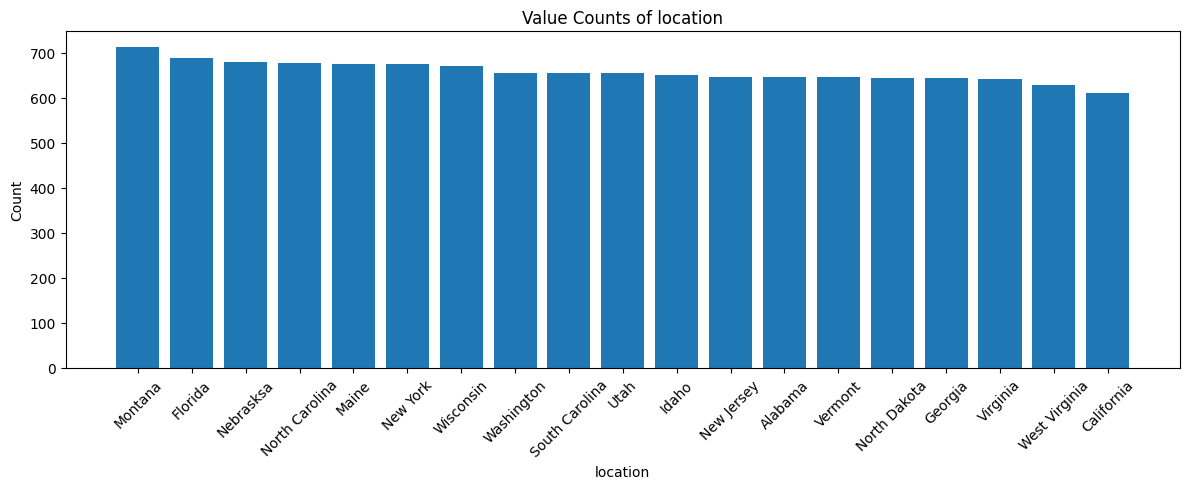

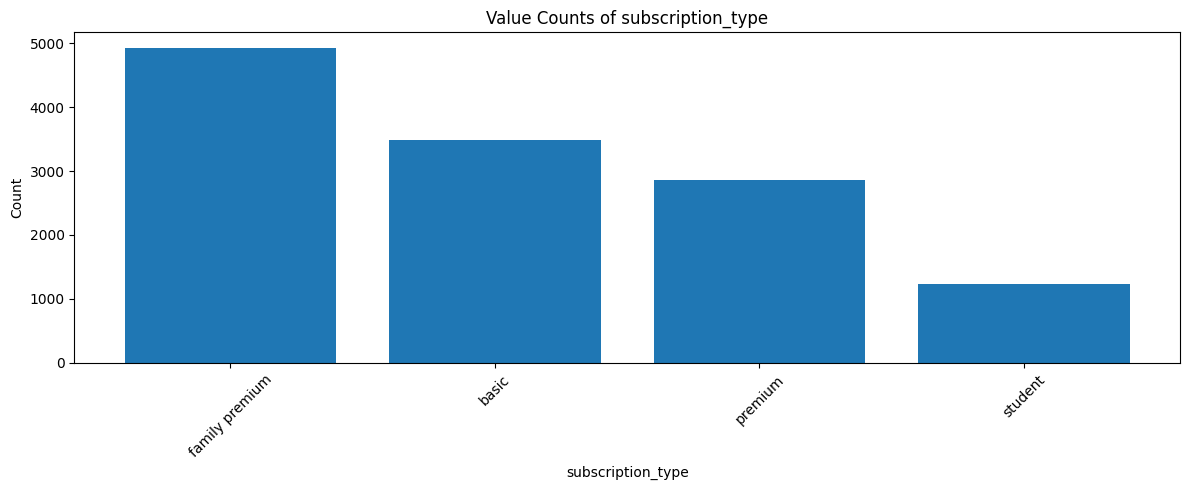

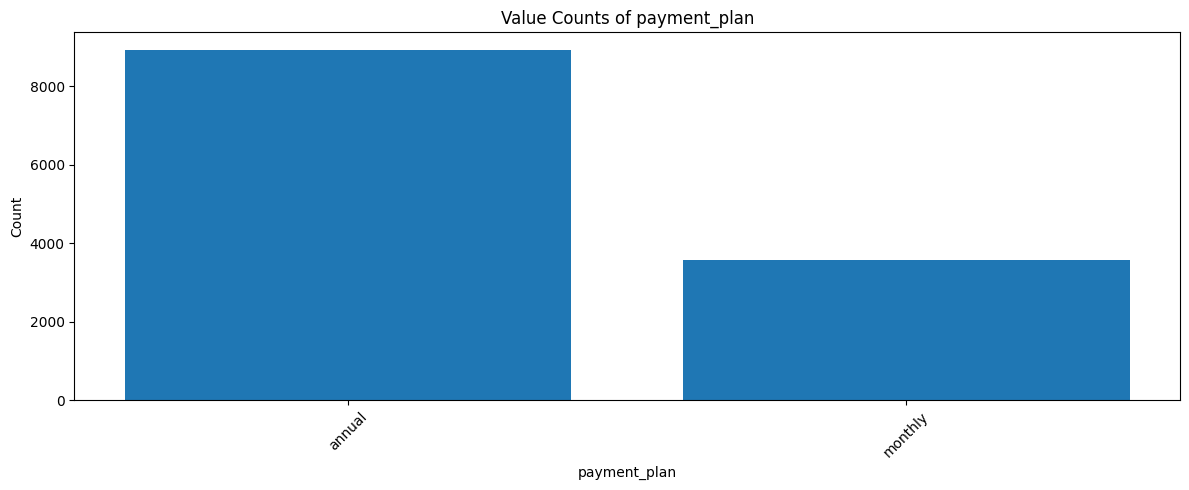

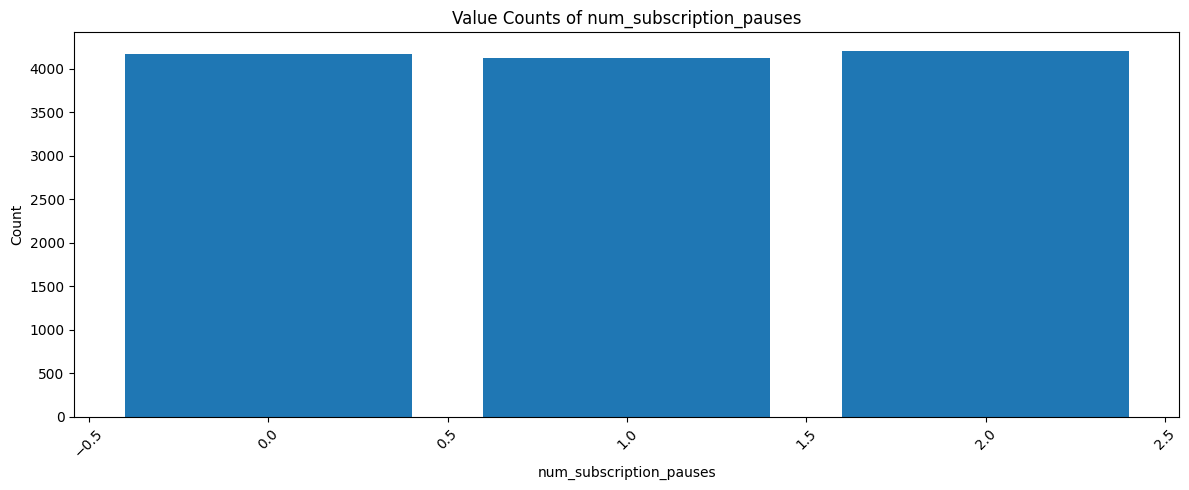

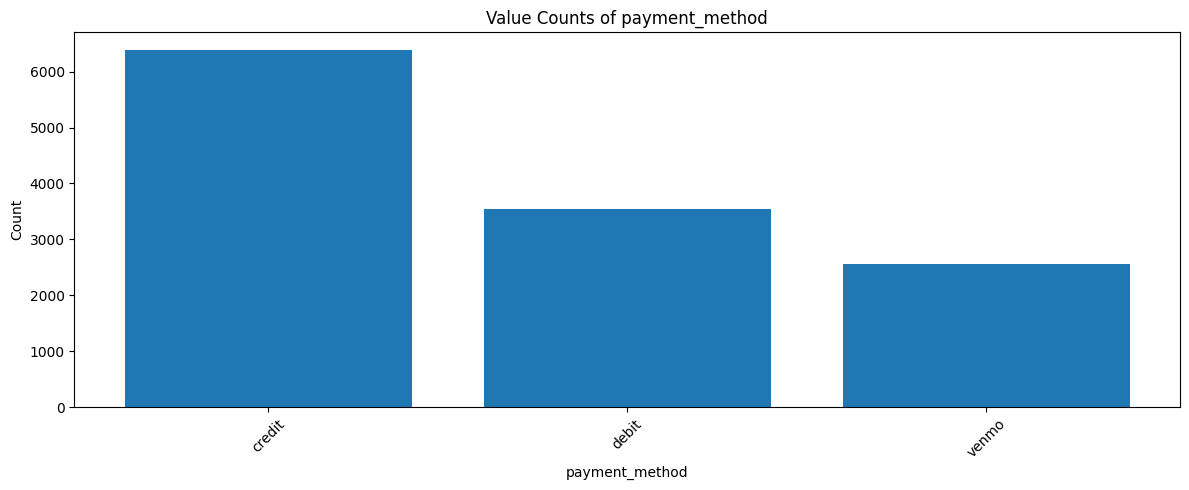

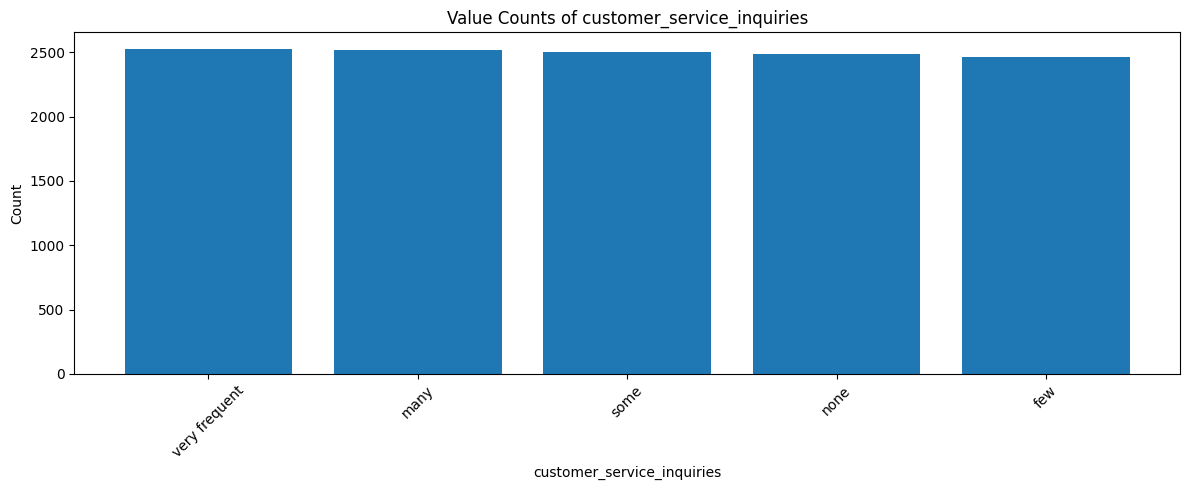

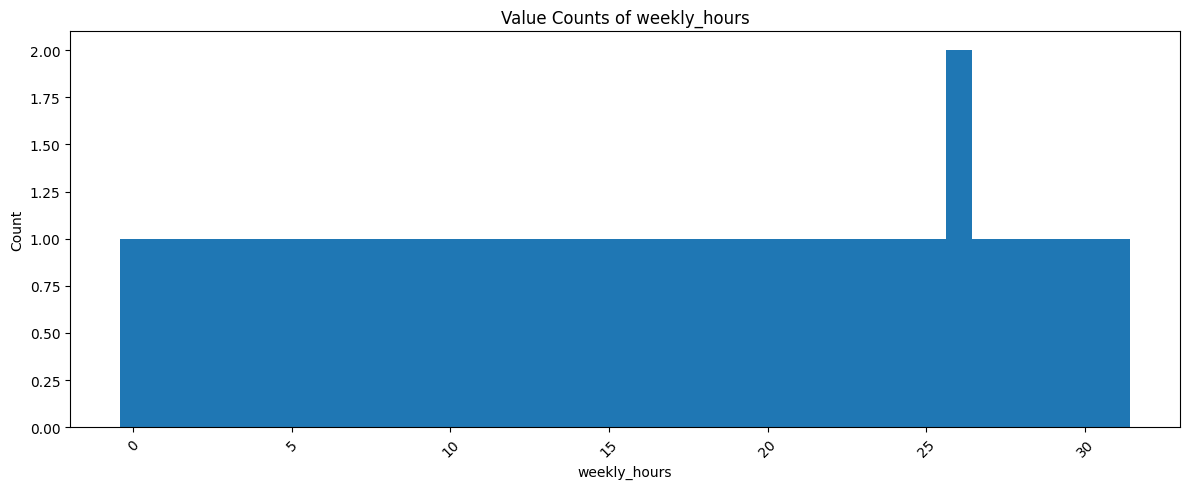

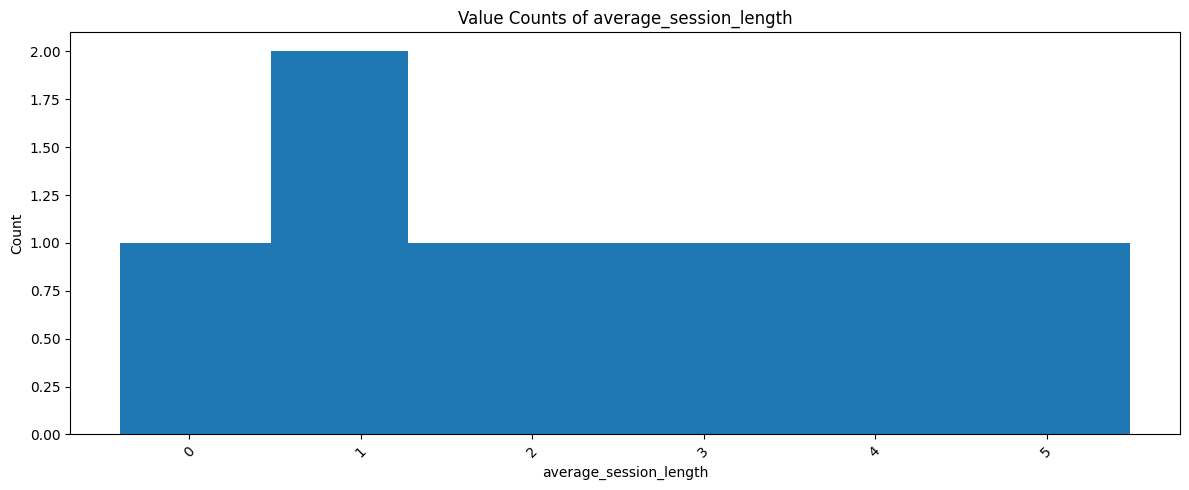

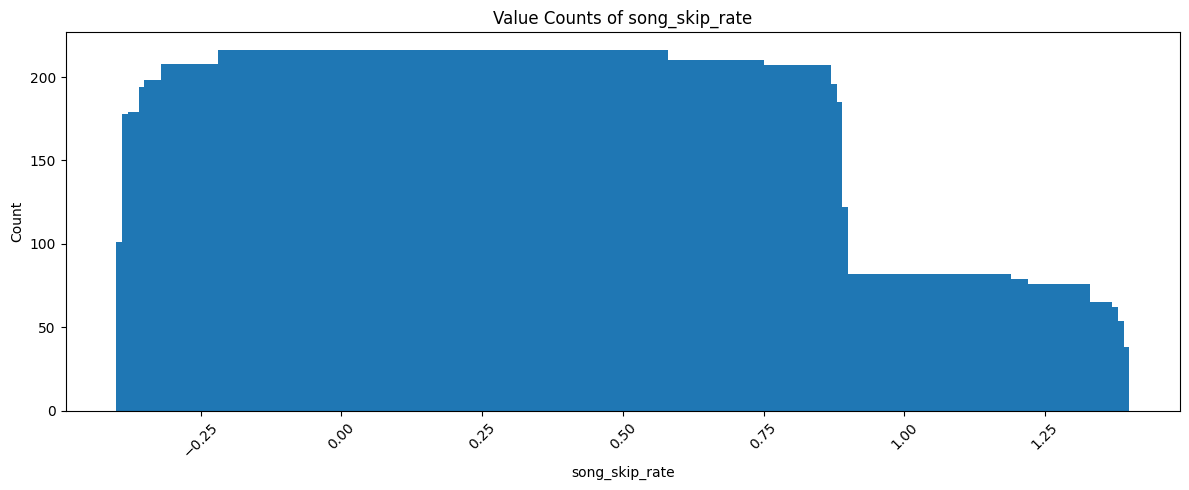

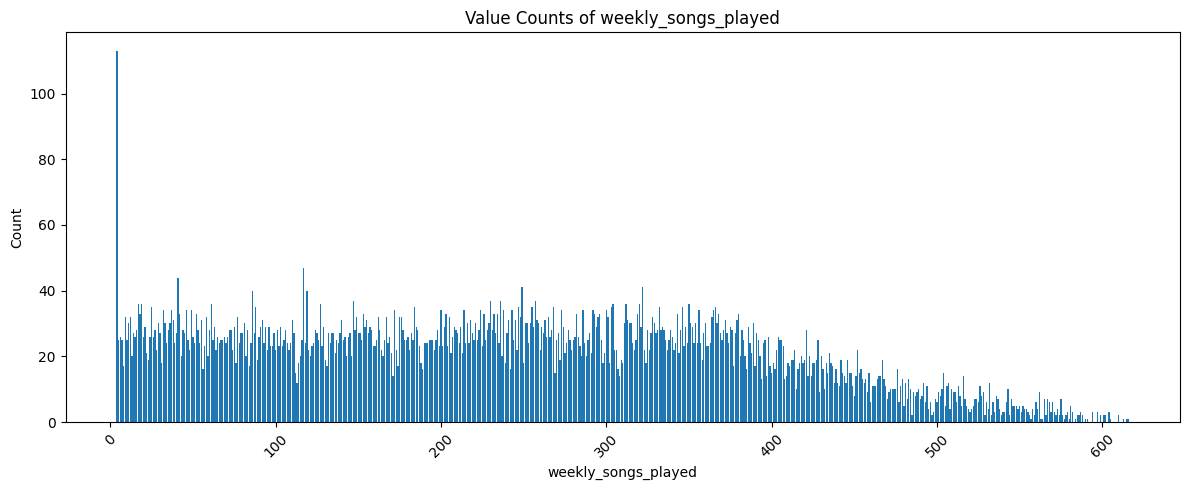

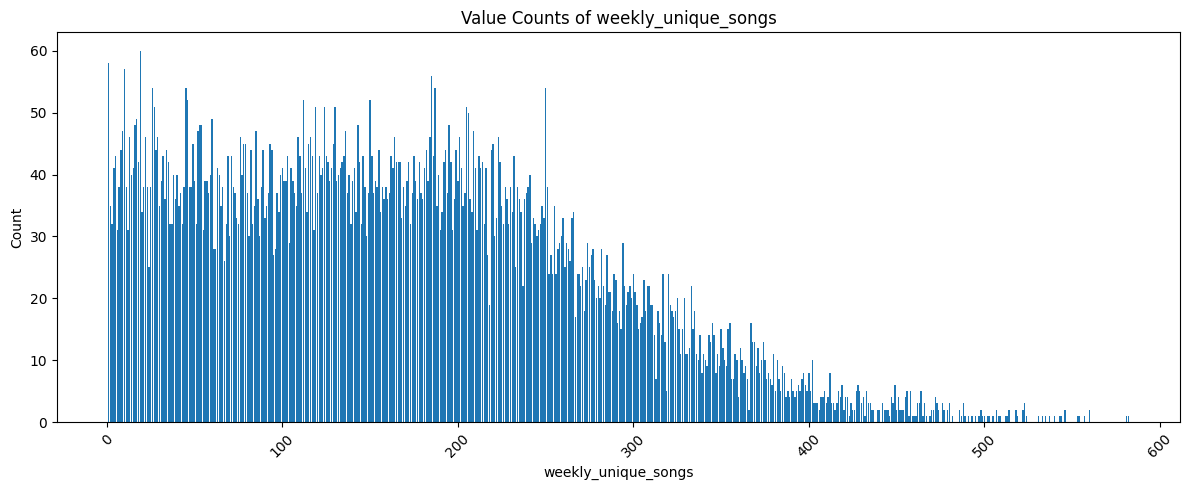

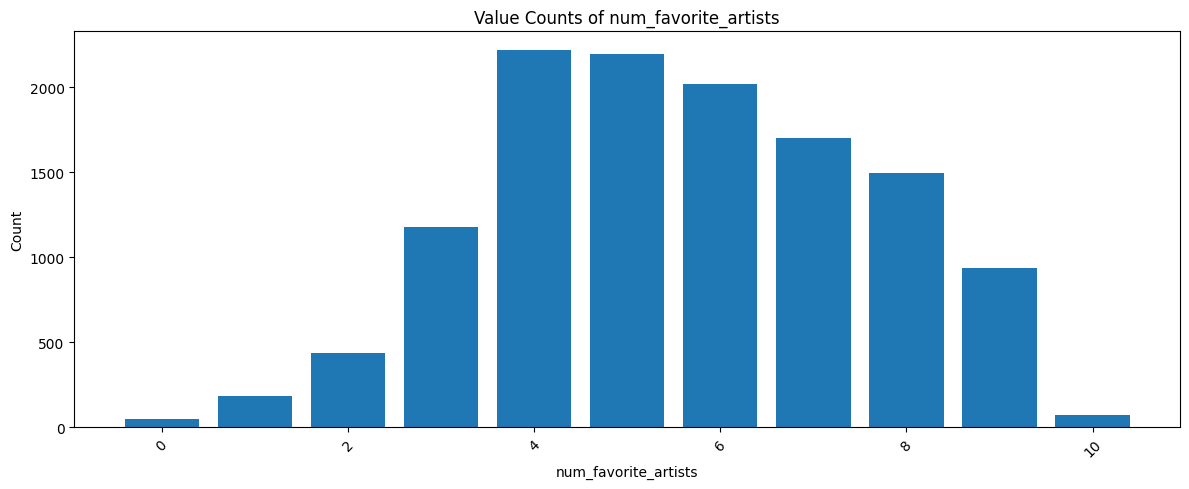

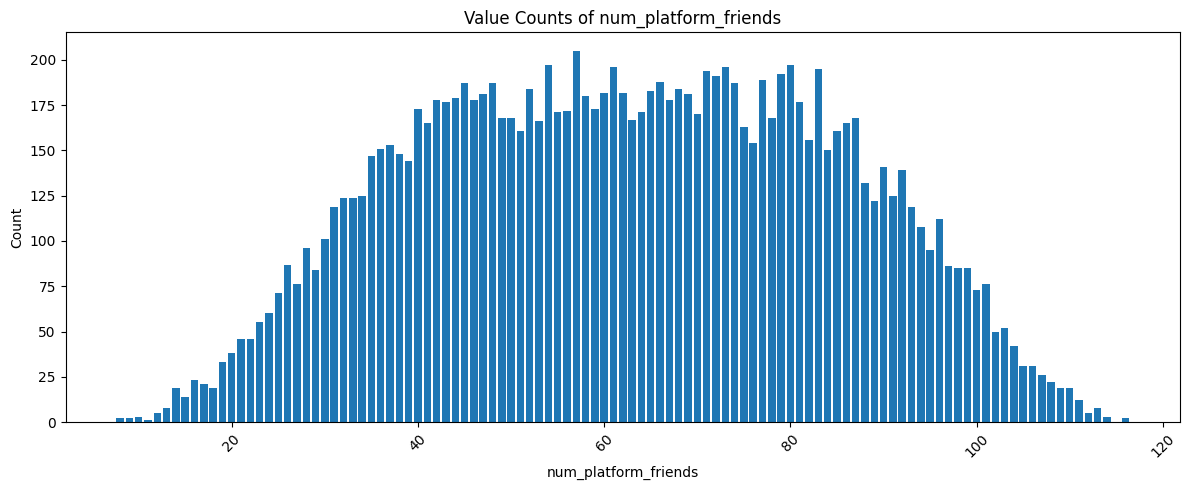

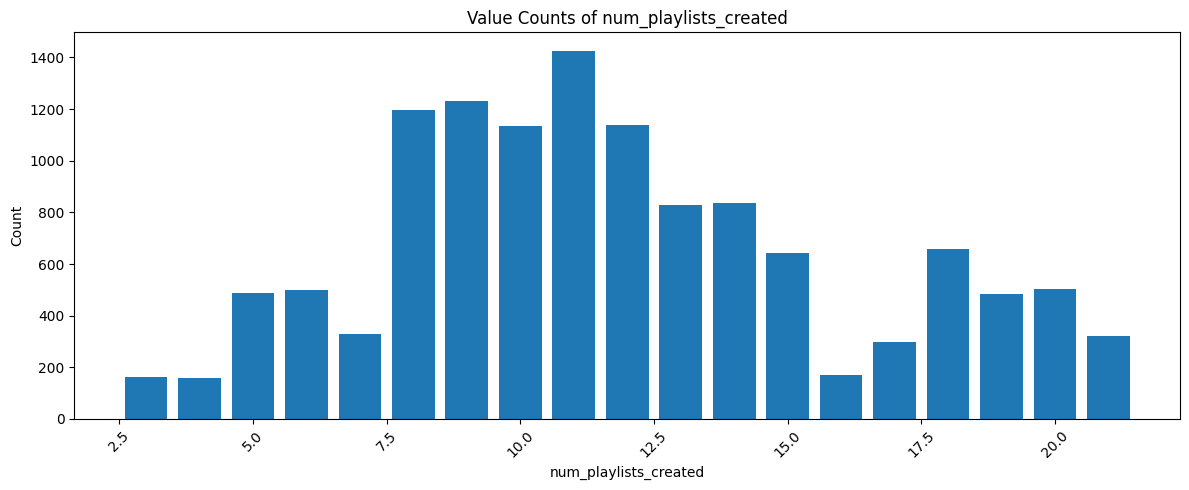

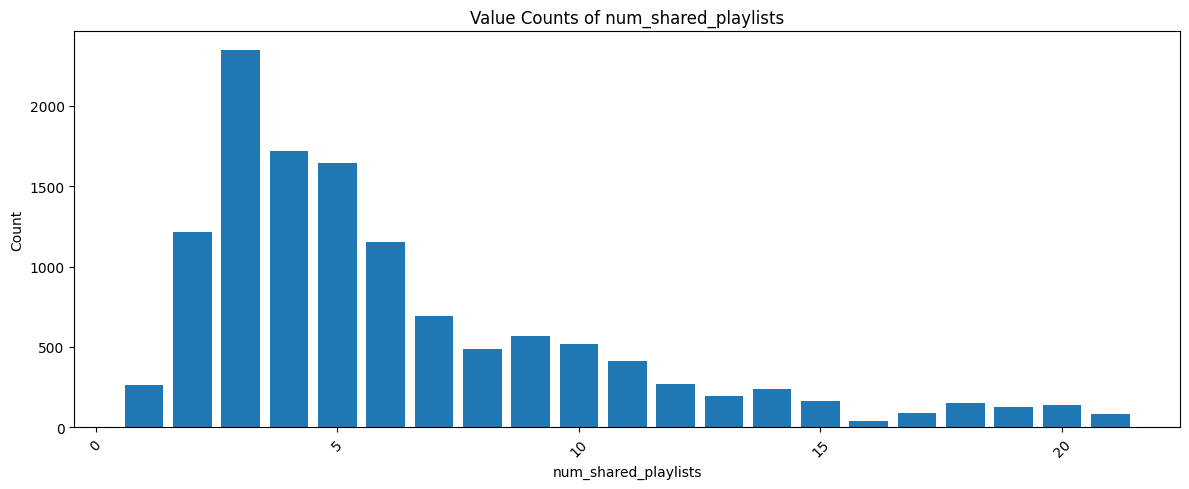

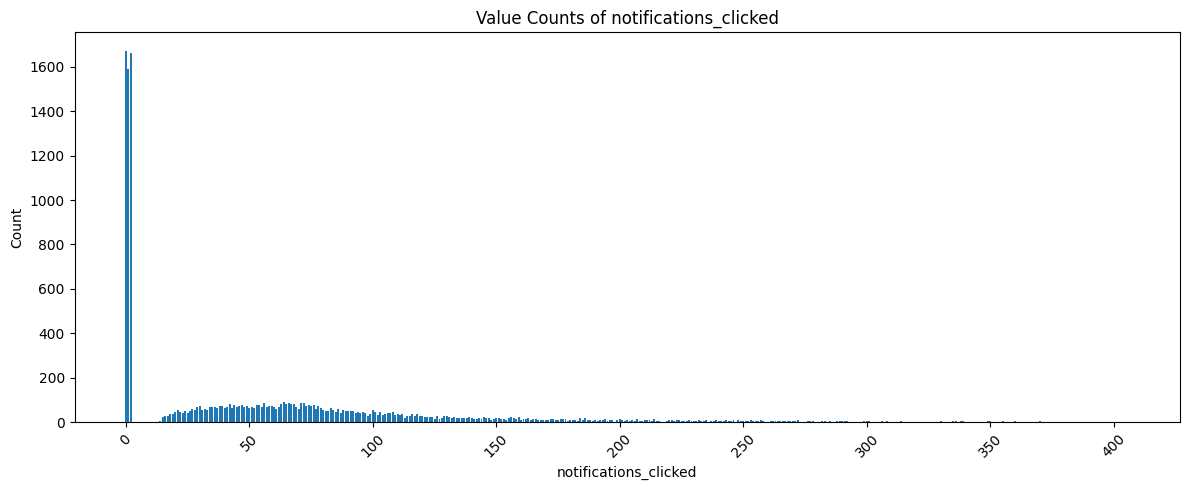

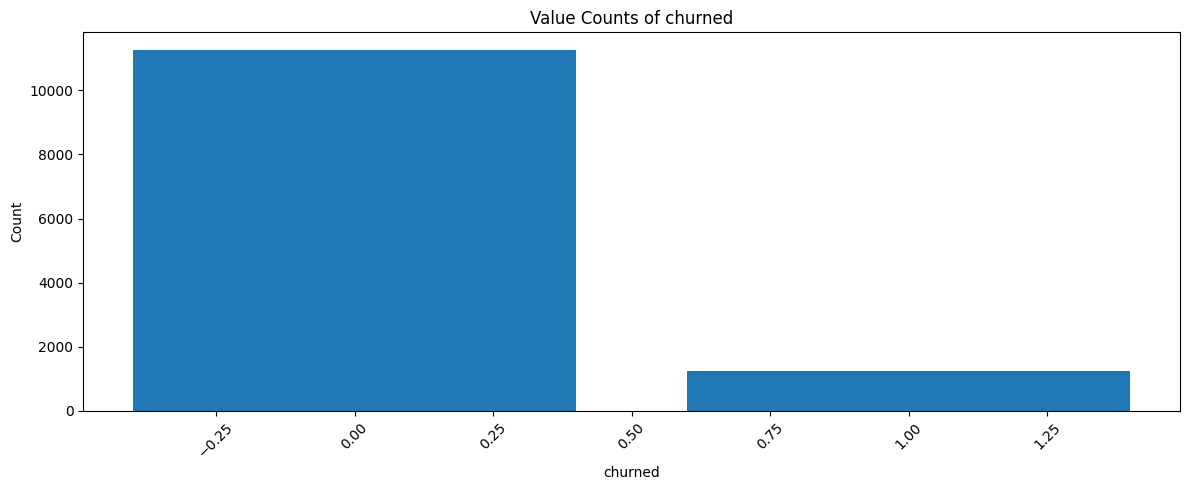

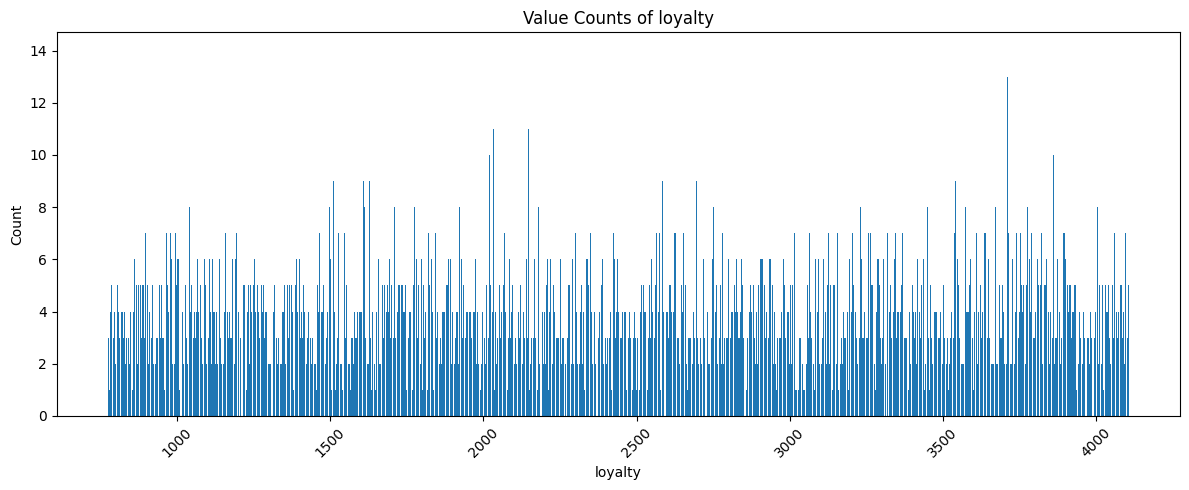

In [107]:
for column in train.columns:
    # Calculate value counts for the column
    value_counts = train[column].value_counts()
    
    # Plot the value counts as a bar chart
    plt.figure(figsize=(12, 5))
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Value Counts of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


In [108]:
from sklearn.preprocessing import LabelEncoder
for i in categorical_features:
    le = LabelEncoder()
    le.fit(train[i])
    train[i] = le.transform(train[i])
    test[i] = le.transform(test[i])

In [109]:
#dropping any duplicate columns in training dataset
train.drop_duplicates(inplace = True)


In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 12500 non-null  int64  
 1   age                         12500 non-null  int64  
 2   location                    12500 non-null  int64  
 3   subscription_type           12500 non-null  int64  
 4   payment_plan                12500 non-null  int64  
 5   num_subscription_pauses     12500 non-null  int64  
 6   payment_method              12500 non-null  int64  
 7   customer_service_inquiries  12500 non-null  int64  
 8   weekly_hours                12500 non-null  float64
 9   average_session_length      12500 non-null  float64
 10  song_skip_rate              12500 non-null  float64
 11  weekly_songs_played         12500 non-null  int64  
 12  weekly_unique_songs         12500 non-null  int64  
 13  num_favorite_artists        125

In [111]:
#creating target variable and training set
y = train['churned']
train.drop('churned',axis = 1, inplace = True)
X = train

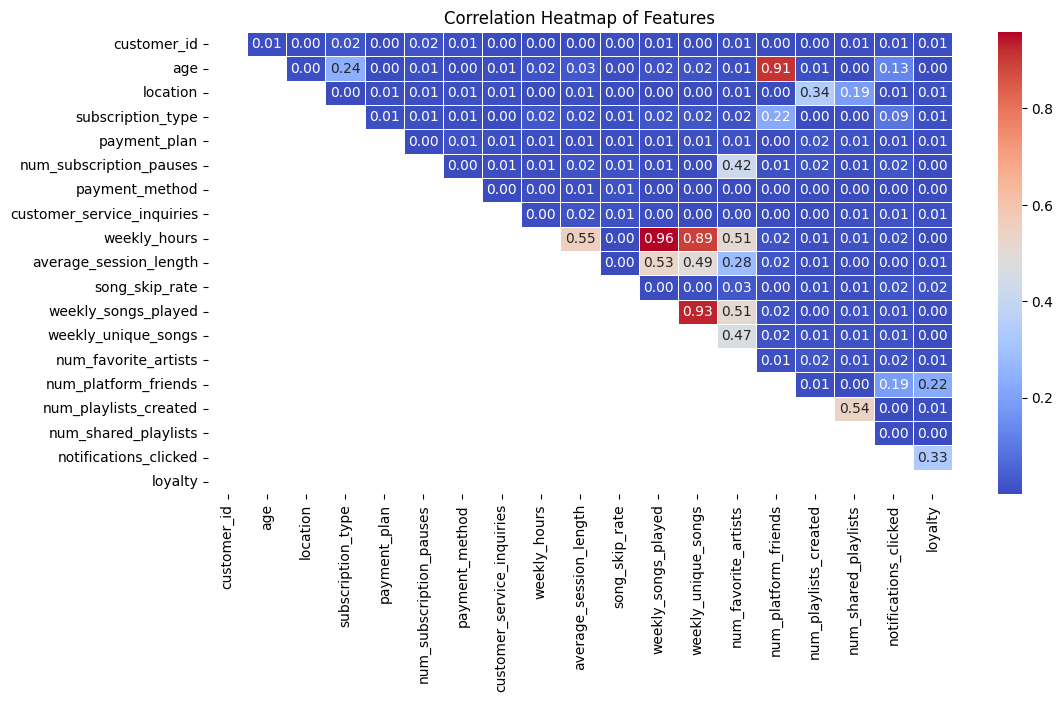

In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# create correlation matrix
corr_matrix = X.corr().abs()

# the upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# plot the heatmap of the upper triangle
plt.figure(figsize=(12, 6))
sns.heatmap(upper_triangle, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [65]:
# function to drop highly correlated features
def find_highly_correlated_features(X: pd.DataFrame,
                                    threshold=0.8) -> pd.DataFrame:

    # create a  correlation matrix
    corr_matrix = X.corr().abs()

    # select the upper triangle of correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # find features with correlation greater than the threshold
    features_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # print and return the features to drop
    print(f"features dropped: {features_to_drop}")
    return features_to_drop

In [114]:
features_to_drop = find_highly_correlated_features(X = X, threshold = 0.7)

features dropped: ['weekly_songs_played', 'weekly_unique_songs', 'num_platform_friends']


In [115]:
X.drop(columns=features_to_drop,axis =1 , inplace = True)
test.drop(columns=features_to_drop,axis =1 , inplace = True)

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [117]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import RobustScaler

# fit and transform the scaler on the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)#_feature_selection)
X_test = scaler.transform(X_test)#_feature_selection)

In [118]:
# import libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=55)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model with a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("No. of 1's predicted: ",np.count_nonzero(y_pred == 1))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3369
           1       0.11      0.00      0.01       381

    accuracy                           0.90      3750
   macro avg       0.50      0.50      0.48      3750
weighted avg       0.82      0.90      0.85      3750

No. of 1's predicted:  9


In [119]:
# Lets predict !
y_pred = clf.predict(test)

y_pred = pd.DataFrame(y_pred, columns = ['churned']) 

#idSet = test['customer_id'] 
#idSet = pd.DataFrame(idSet, columns = ['customer_id']) 

output = pd.concat([test['customer_id'], y_pred['churned']], axis=1)
output

/home/kristof/src/kaggle/.venv/lib64/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


,customer_id,churned
0,12501,0
1,12502,0
2,12503,1
3,12504,0
4,12505,1
...,...,...
2495,14996,0
2496,14997,0
2497,14998,0
2498,14999,1
